In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [6]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [7]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.22971824, -0.0860146 ,  0.02385131, -0.20081034, -0.19150649,
         -0.16796304, -0.2033085 ,  0.01962546, -0.11868316,  0.24356294,
          0.00992921,  0.268179  , -0.1647629 ,  0.11717194,  0.27283418,
         -0.06149136, -0.04803801, -0.00967434, -0.05252719, -0.13971725,
          0.12804252, -0.11483033, -0.28625873,  0.2934041 , -0.08456676,
          0.05942807, -0.0492958 , -0.14696564,  0.2804563 , -0.13562469,
          0.01424816, -0.19215262,  0.01112986, -0.22529542, -0.07933578,
          0.24738228, -0.14717504,  0.0451166 , -0.0131335 ,  0.2114982 ,
          0.14909515,  0.12111655, -0.27782324, -0.17575306,  0.25855148,
          0.2359541 , -0.0773322 , -0.19028309, -0.07787828,  0.2985208 ,
         -0.1744003 ,  0.08365202, -0.2864117 ,  0.01699725,  0.02240503,
          0.15171105,  0.26984763, -0.0533912 ,  0.1180245 ,  0.24204236,
         -0.11673667, -0.01061827, -0.14536

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API

두 개의 Dense 층을 가진 간단한 함수형 모델

In [13]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
inputs = keras.Input(shape=(3,), name="my_input")

In [15]:

inputs.shape

TensorShape([None, 3])

In [16]:

inputs.dtype

tf.float32

In [17]:
features = layers.Dense(64, activation="relu")(inputs)

In [18]:
features.shape

TensorShape([None, 64])

In [19]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


다중 입력, 다중 출력 모델 훈련하기

In [21]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

In [22]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 8ms/step


입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈련하기

In [24]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},# 함수 title,test_body,tags = input
               {"priority": priority_data, "department": department_data}) # 3개를 입력해서 2개로 출력됨. priority, department
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 7ms/step


함수형 API의 장점: 층 연결 구조 활용하기

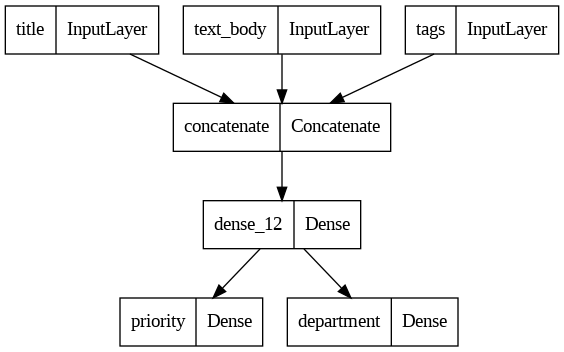

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

keras.utils.plot_model(model, "ticket_classifier.png")

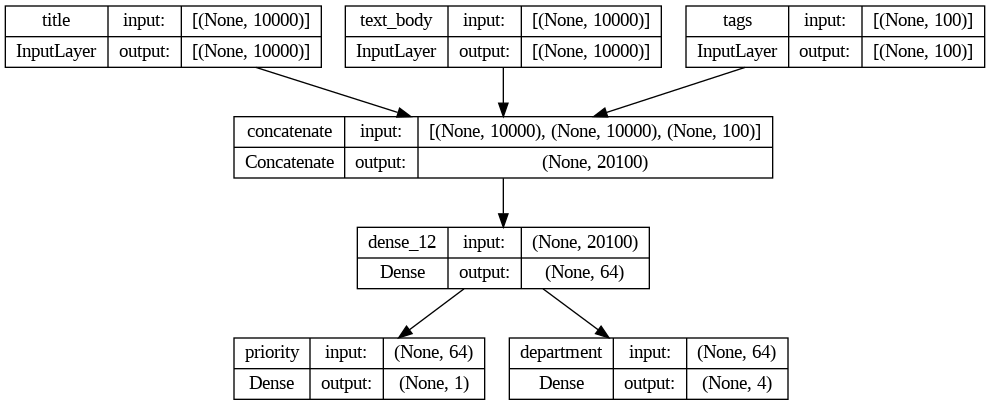

In [26]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [27]:
model.layers

In [28]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [29]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [30]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

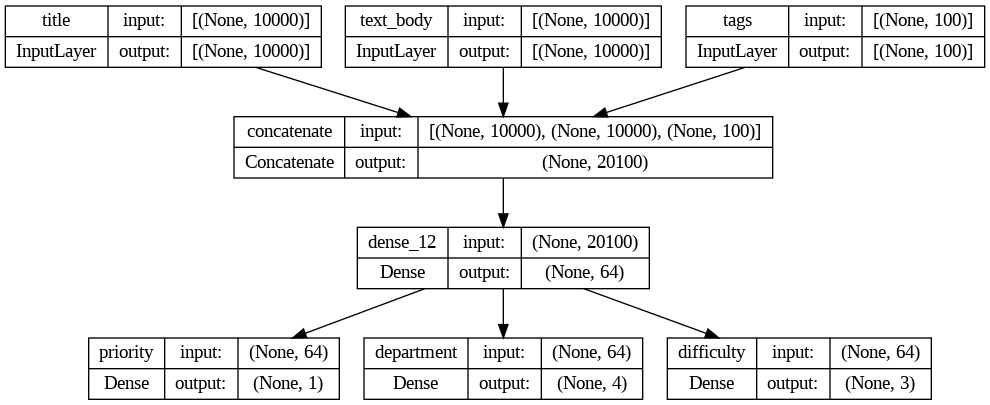

In [31]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

사용자 함수의 장점을 유연하게 사용할 수 있지만
단점은 난이도가 높다-> 검증하기가 어렵다

In [36]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [37]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {'title': title_data, 'text_body':text_body_data, 'tags':tags_data}
)

In [39]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 8ms/step


# 여러 방식을 혼합하여 사용하기

서브클래싱한 모델을 포함하는 함수형 모델 만들기

In [50]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs) #여기까지 만든게 Classifier = '서브 클래싱 모델'

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features) # <- 위에서 만든 서브클래싱 모델을 여기에 넣어준다.
model = keras.Model(inputs=inputs, outputs=outputs) # 서브클래싱한 모델을 포함한 함수형 모델 생성

 함수형 모델을 포함하는 서브클래싱 모델 만들기

In [51]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs) #함수형 모델

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier #<- 위에서 만든 함수형 모델을 적용해준다

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel() #함수형 모델이 포함된 서브클래싱 모델 생성

## 작업에 적합한 도구 사용하기

In [49]:
# 기본형이므로 안보고도 칠 수 잇어야 함
# 딥러닝 표준 워크 플로우

from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features) # 드롭아웃 레이어(n% 확률로 입력 유닛을 무작위 제외 -> 과적합 방지)
                                             # 이 경우 50%
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
# 28*28 = 784픽셀의 1차원 배열로 평탄화=> 우리가 여기서쓰는건 완전 연결층. <-얘는 평탄화 해줘야함.
# 그래야 입력되는 픽셀에 대해 독립적으로 처리해준다. 2차원 배열일때는 적용이 안됨.
# 그러다보니 완전연결체는 영상,이미지를 다루는데에 한계가 있다.
# = 완전 연결층은 각 입력 픽셀을 독립적인 특징으로 처리, 개별적으로 학습, 처리

images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
#255를 나누는 이유 -> 이미지 픽셀 사이즈 28x28(가로세로)를 정규화해주기 위해(0~1사이 값으로 전부 바꾸려고:정규화)
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # 원핫 인코딩되지 않은 정수 레이블을 기대
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels) # evaluate(): 새로운 데이터에 대한 손실과 측정 지표 계산.
predictions = model.predict(test_images)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2956 - accuracy: 0.9128 - val_loss: 0.1467 - val_accuracy: 0.9568
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1581 - accuracy: 0.9544 - val_loss: 0.1048 - val_accuracy: 0.9691
Epoch 3/3
313/313 [==============================] - 1s 4ms/step


사용자 정의 지표 만들기

In [48]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [52]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()]) # RootMeanSquaredError() 함수 가져옴.
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 14s 8ms/step - loss: 0.2927 - accuracy: 0.9123 - rmse: 7.1767 - val_loss: 0.1525 - val_accuracy: 0.9551 - val_rmse: 7.3621
Epoch 2/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1601 - accuracy: 0.9541 - rmse: 7.3532 - val_loss: 0.1100 - val_accuracy: 0.9683 - val_rmse: 7.3961
Epoch 3/3
313/313 [==============================] - 2s 6ms/step - loss: 0.1007 - accuracy: 0.9716 - rmse: 7.4338
